In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('banking.csv')

# Застосування one-hot до категорійних характеристик
df = pd.get_dummies(df)

# Підготовка даних
X = df.drop('y', axis=1)
y = df['y']

In [6]:
# Завдання 1: Розбиття даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Завдання 2: Створення та тренування моделі й прогноози
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Матриця помилок отрыманих значення TN, FP, FN, TP):  [[10597   334]
 [  828   598]]
Точність:  0.6416309012875536
Повнота:  0.41935483870967744
F1-оцінка, середнє гармонічне точності та повноти:  0.5072094995759118


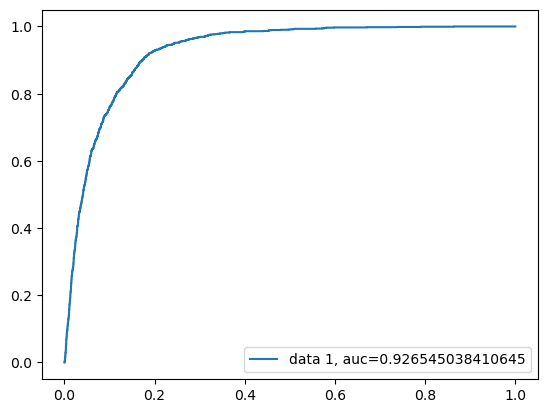

In [8]:
# Завдання 3: Оцінка моделі
print("Матриця помилок отрыманих значення TN, FP, FN, TP): ", confusion_matrix(y_test, y_pred))
print("Точність: ", precision_score(y_test, y_pred))
print("Повнота: ", recall_score(y_test, y_pred))
print("F1-оцінка, середнє гармонічне точності та повноти: ", f1_score(y_test, y_pred))

# Побудова AUC-ROC кривої
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Матриця помилок отриманих значень (TN, FP, FN, TP):  [[9920 1050]
 [ 364  976]]
Точність:  0.4817374136229023
Повнота:  0.7283582089552239
F1-оцінка, середнє гармонічне точності та повноти:  0.5799168152109329


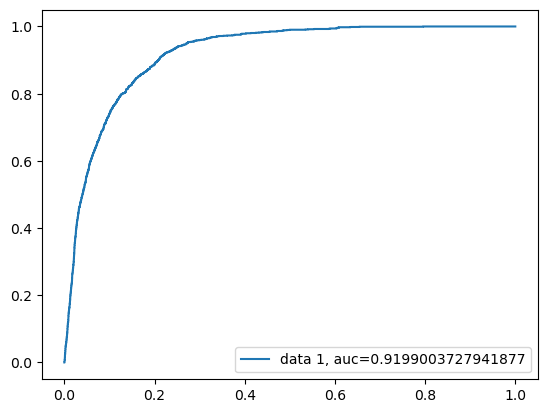

In [10]:
# я багато разів експерементував, й вирішив ще таку модель показати, де більша повнота но менша точність: 

# Завантаження даних з файлу
data = pd.read_csv('banking.csv')

# Видалення непотрібних колонок
columns_to_drop = ['education', 'default', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'job']
data = data.drop(columns=columns_to_drop)

# Перетворення колонки 'poutcome' на числові значення
data['poutcome'] = data['poutcome'].map({'failure': 0, 'nonexistent': 1, 'success': 2})

# Перетворення колонки 'housing' на числові значення
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})

# Перетворення колонки 'marital' на числові значення
data['marital'] = data['marital'].map({'divorced': 0, 'married': 1, 'single': 2})

# Перетворення колонки 'loan' на числові значення
data['loan'] = data['loan'].map({'yes': 0, 'no': 1, 'unknown': -1})

# Видалення рядків з віком менше 18 і більше або рівним 80
data = data[(data['age'] >= 18) & (data['age'] < 80)]

# Заповнення відсутніх значень усередненими значеннями
data = data.fillna(data.mean())

# Підготовка даних
X = data.drop('y', axis=1)
y = data['y']

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення моделі логістичної регресії з врахуванням вагових коефіцієнтів
model = LogisticRegression(max_iter=10000, class_weight={0: 0.5, 1: 2})

# Навчання моделі на тренувальних даних
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

print("Матриця помилок отриманих значень (TN, FP, FN, TP): ", confusion_matrix(y_test, y_pred))
print("Точність: ", precision_score(y_test, y_pred))
print("Повнота: ", recall_score(y_test, y_pred))
print("F1-оцінка, середнє гармонічне точності та повноти: ", f1_score(y_test, y_pred))

# Побудова AUC-ROC кривої
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
